In [1]:
import numpy as np #只需要下载numpy库即可
import GridWorld_v1

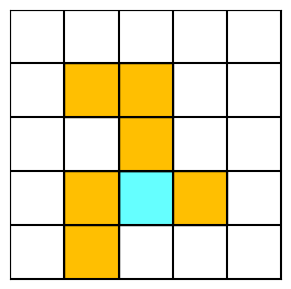

In [2]:
gamma = 0.9   #折扣因子，越接近0越近视
rows = 5      #记得行数和列数这里要同步改
columns = 5
# gridworld = GridWorld_v1.GridWorld_v1(rows=rows, columns=columns, forbiddenAreaNums=4, targetNums=2, seed = random.randint(1,1000))
# gridworld = GridWorld_v1.GridWorld_v1(desc = [".#",".T"])             #赵老师4-1的例子
# gridworld = GridWorld_v1.GridWorld_v1(desc = ["##.T","...#","...."])  #随便弄的例子
desc = [".....",".##..","..#..",".#T#.",".#..."]
gridworld = GridWorld_v1.GridWorld_v1(forbidden_area_score=-10, score=1,desc = desc) 
gridworld.show()

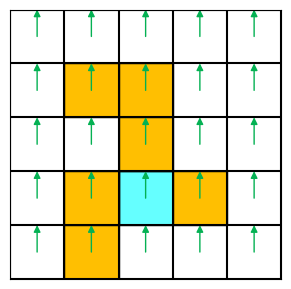

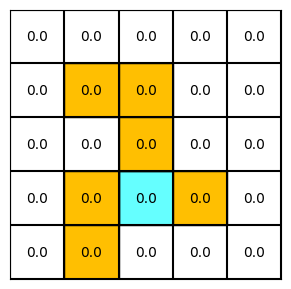

In [3]:
value = np.zeros(rows*columns).reshape(rows,columns)       #初始化可以任意，也可以全0
qtable = np.zeros((rows*columns,5)).reshape(rows,columns,5)  #初始化，这里主要是初始化维数，里面的内容会被覆盖所以无所谓
policy = np.argmax(qtable,axis=1).reshape(rows,columns)    #初始策略
gridworld.show_policy(policy)
gridworld.show_value(value)

In [4]:
class ValueIteration:
    def __init__(self, env, theta, gamma):
        self.env = env
        self.theta = theta
        self.gamma = gamma
        self.v = np.zeros((env.rows, env.columns))
        # //初始化策略
        self.pi = np.zeros((env.rows, env.columns))

    def value_iteration(self):
        while True:
            new_v = np.zeros((rows, columns))
            max_diff = 0
            for i in range(rows):
                for j in range(columns):
                    qsa_list = []
                    for a in range(5):
                        next_state, reward, done = self.env.step([i, j], a)
                        qsa = reward + self.gamma * self.v[next_state[0], next_state[1]]
                        qsa_list.append(qsa)
                    new_v[i][j] = max(qsa_list)
                    max_diff = max(max_diff, abs(new_v[i][j] - self.v[i][j]))

            self.v = new_v
            if max_diff < self.theta:
                break

        self.get_policy()
        
    def get_policy(self):
        for i in range(rows):
            for j in range(columns):
                qsa_list = []
                for a in range(5):
                    next_state, reward, done = self.env.step([i, j], a)
                    qsa = reward + self.gamma * self.v[next_state[0], next_state[1]]
                    qsa_list.append(qsa)
                self.pi[i][j] = np.argmax(qsa_list)


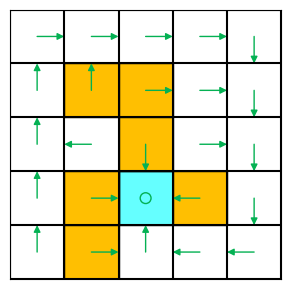

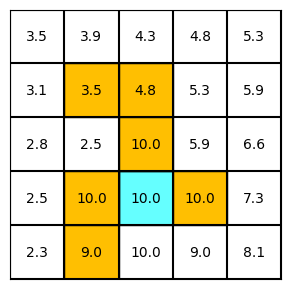

In [5]:
theta = 0.001
gamma = 0.9
agent = ValueIteration(gridworld, theta, gamma)
agent.value_iteration()
gridworld.show_policy(agent.pi)
gridworld.show_value(agent.v)